In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
supplychain_df =pd.read_csv(r"C:\Users\Hariom Keshari\Downloads\Supply chain\supply_chain_data.csv", encoding = 'unicode_escape')
supplychain_df

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


In [4]:
supplychain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [5]:
supplychain_df.shape

(100, 24)

In [6]:
supplychain_df.describe().style.background_gradient(cmap = 'winter_r')

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.770000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.912430,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.000000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.000000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.000000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.000000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.000000,99.466109,4.939255,997.413450


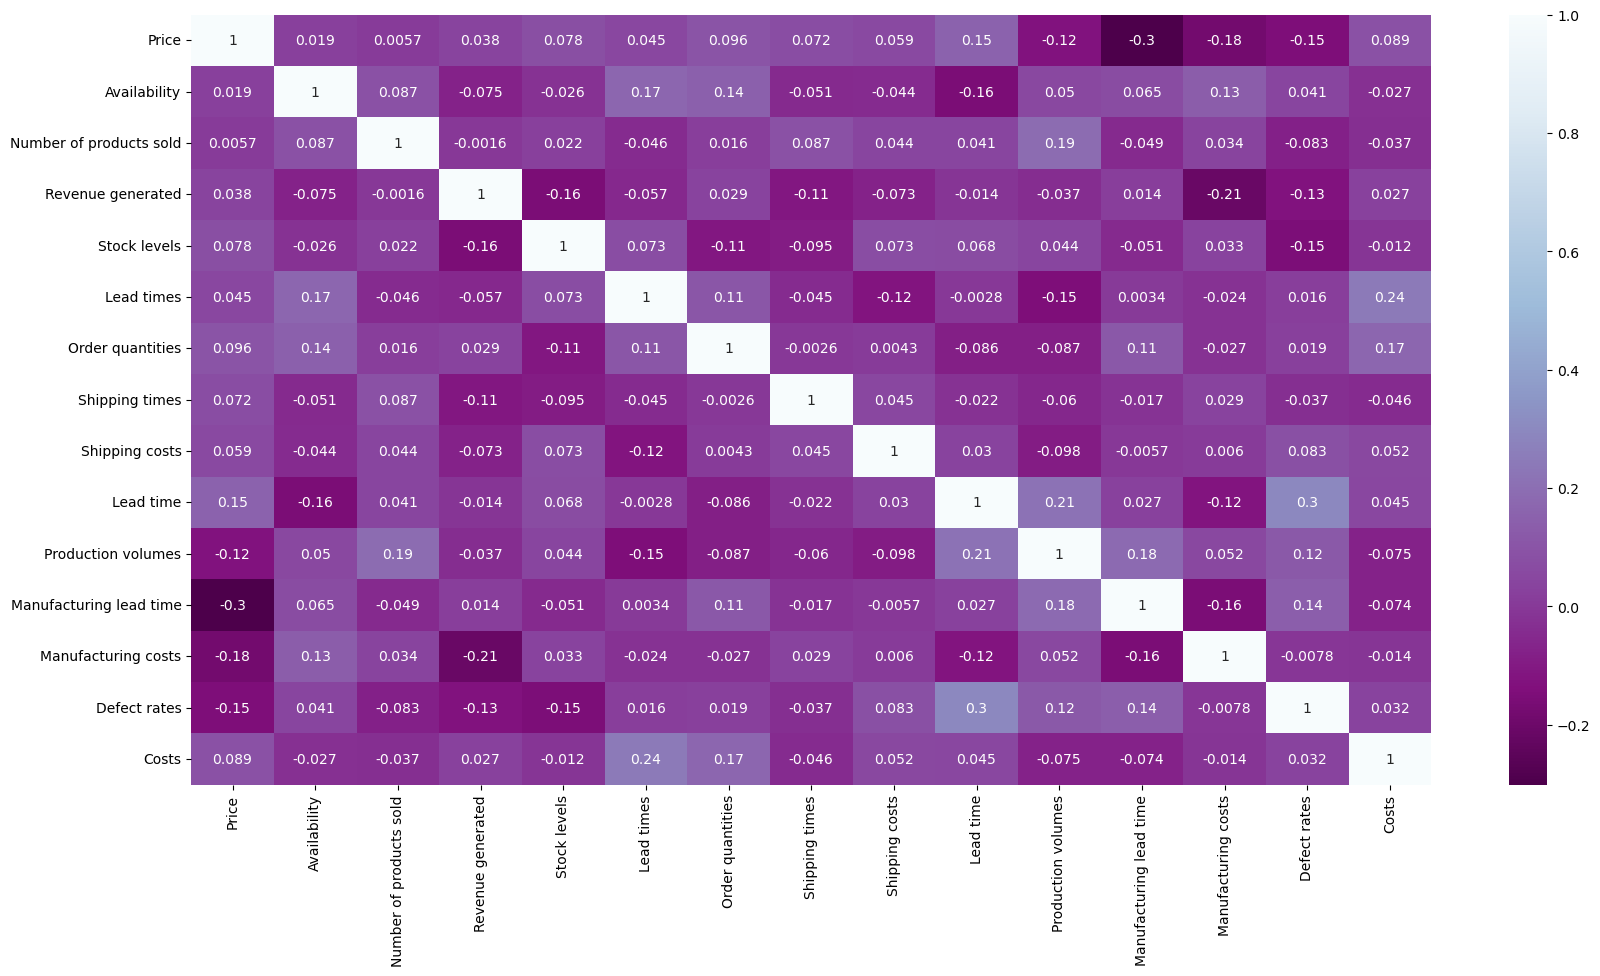

In [7]:
plt.figure(figsize = (20,10))
sns.heatmap(supplychain_df.corr(), annot = True, cmap = 'BuPu_r')
plt.show()

In [8]:
#checking for null values
supplychain_df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [9]:
#Let's separate the categorical and numerical columns
categorical=[i for i in supplychain_df.columns if supplychain_df[i].dtypes=='object']
numerical=[i for i in supplychain_df.columns if supplychain_df[i].dtypes!='object']

In [10]:
categorical

['Product type',
 'SKU',
 'Customer demographics',
 'Shipping carriers',
 'Supplier name',
 'Location',
 'Inspection results',
 'Transportation modes',
 'Routes']

In [11]:
numerical

['Price',
 'Availability',
 'Number of products sold',
 'Revenue generated',
 'Stock levels',
 'Lead times',
 'Order quantities',
 'Shipping times',
 'Shipping costs',
 'Lead time',
 'Production volumes',
 'Manufacturing lead time',
 'Manufacturing costs',
 'Defect rates',
 'Costs']

# Explore Data Analysis

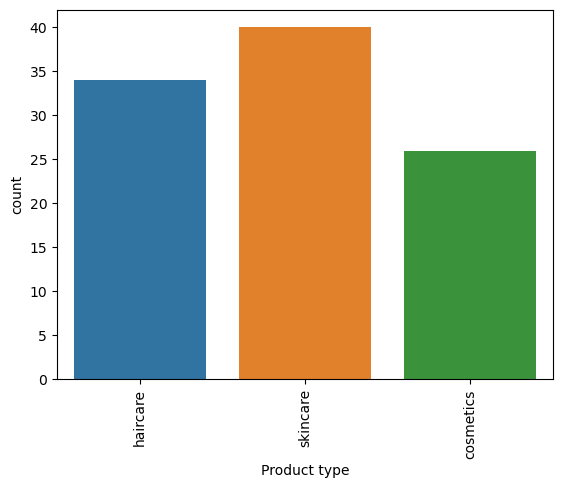

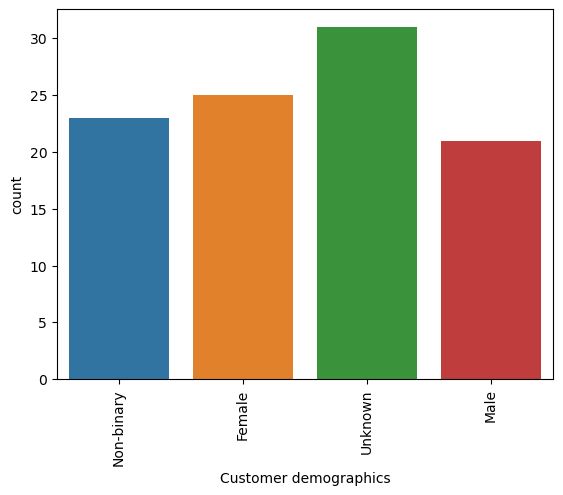

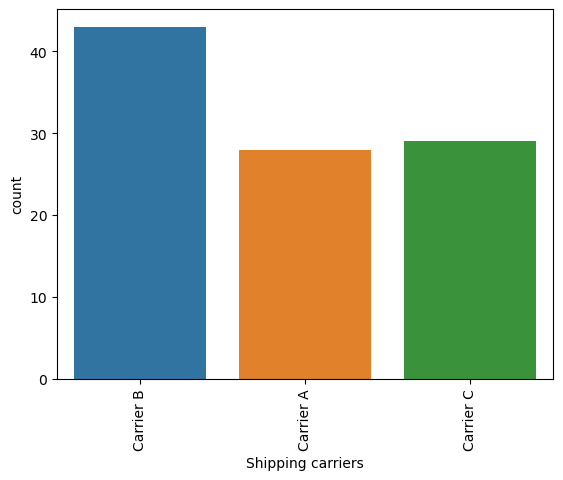

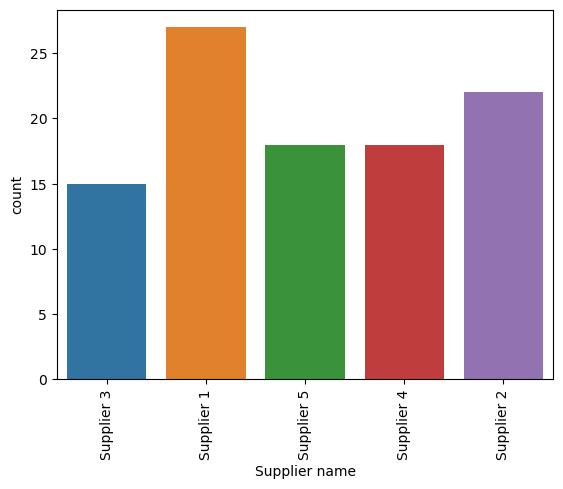

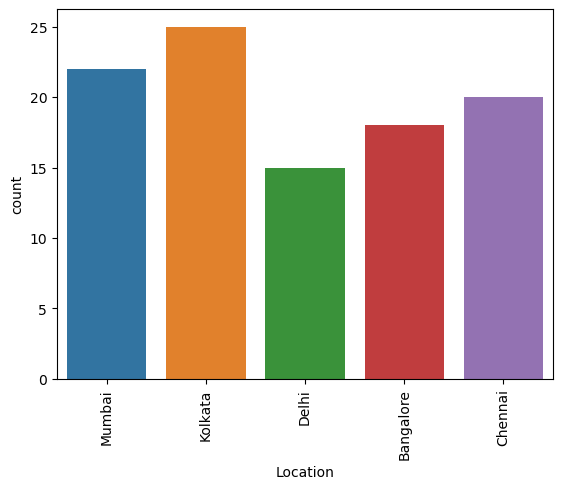

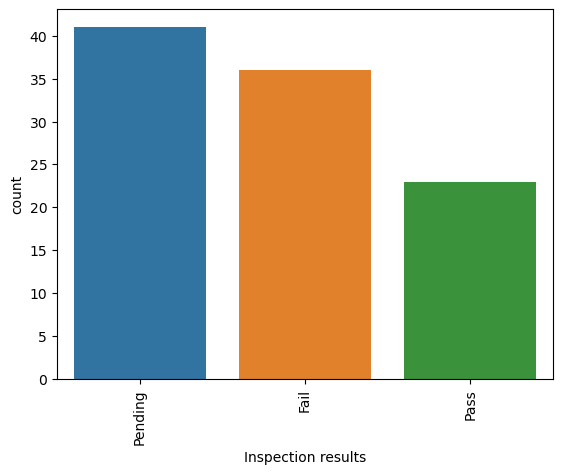

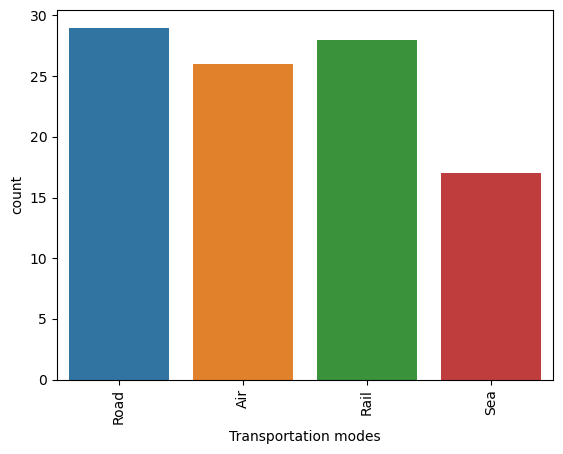

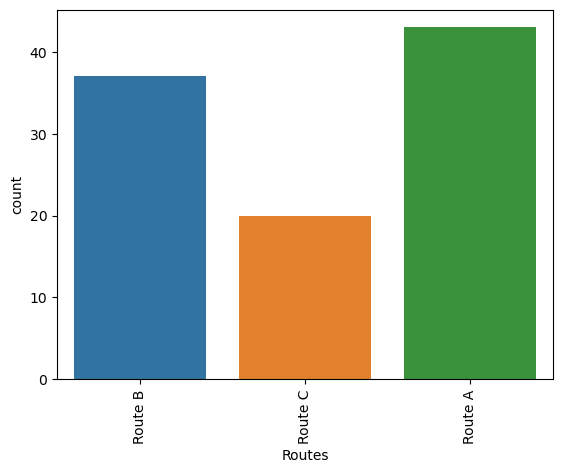

In [12]:
#Visualize the all the categorical columns value in the dataset using the countplots
for i in categorical:
    if i == 'SKU':
          continue
    sns.countplot(data=supplychain_df,x=supplychain_df[i])
    plt.xticks(rotation=90)
    plt.show()

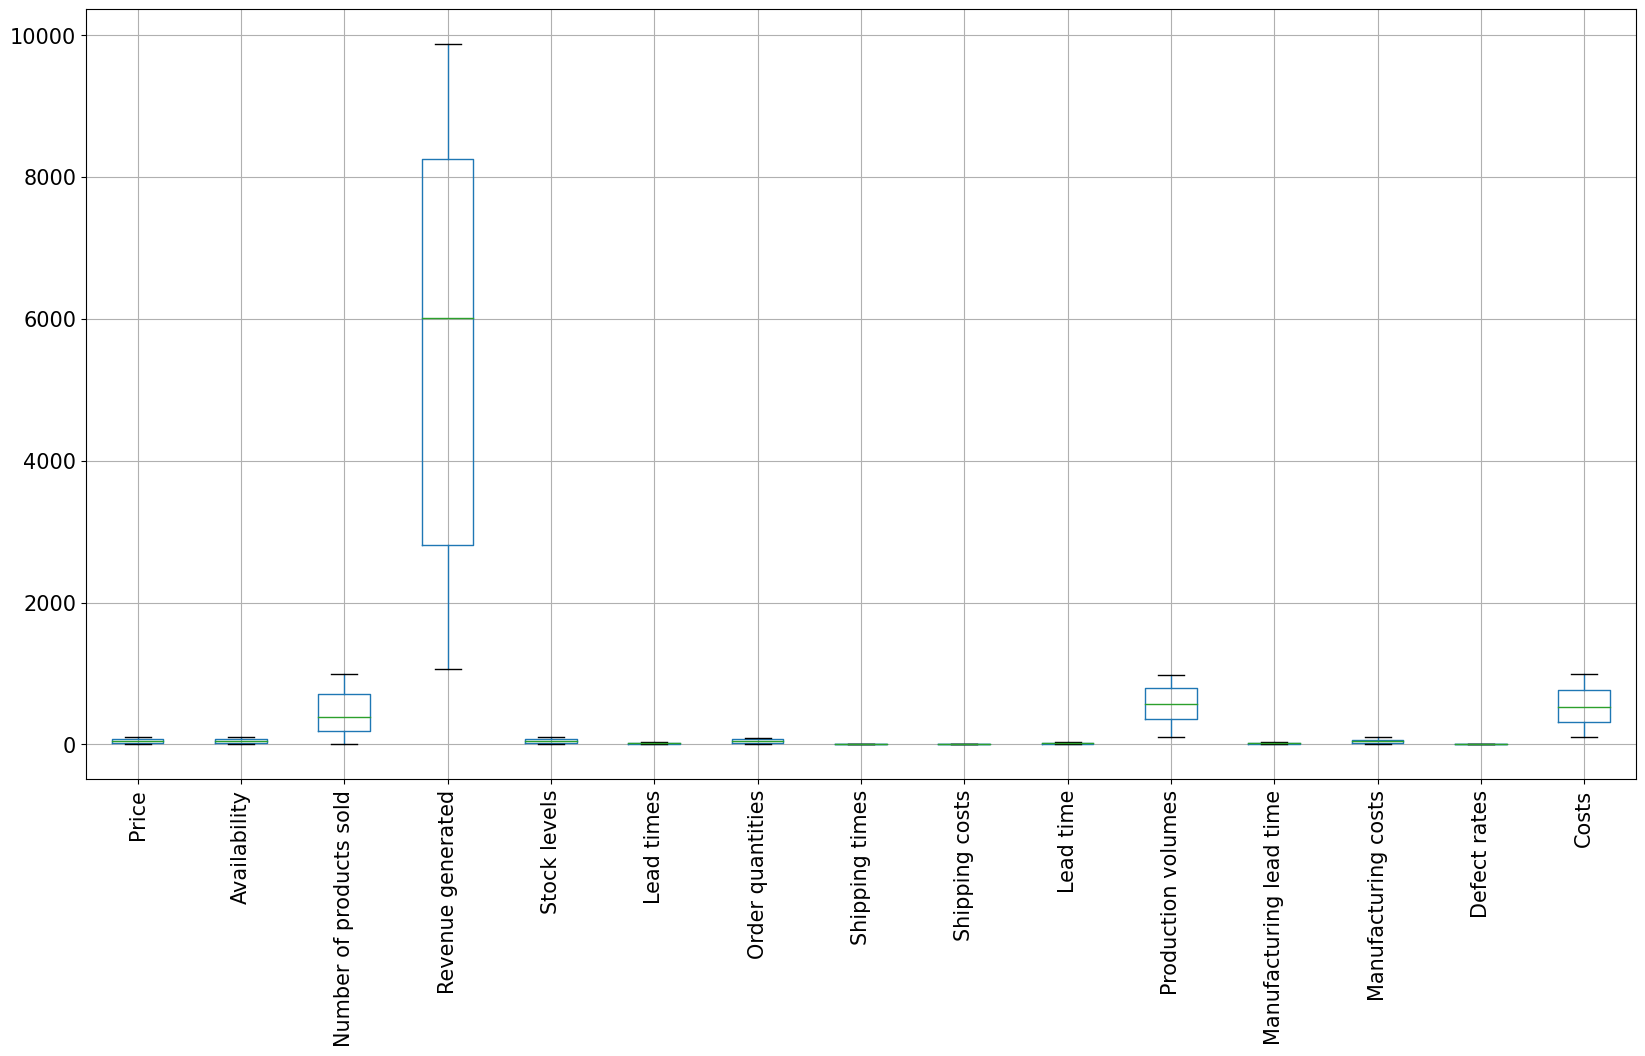

In [13]:
# visualizing the box plot with data
plt.figure(figsize=(20,10))
supplychain_df.boxplot(grid=True, rot=90, fontsize=15);

In [14]:
# visualizing the each product type with revenue generated
supplychain_df.groupby(['Product type'])['Revenue generated'].sum()

Product type
cosmetics    161521.265999
haircare     174455.390605
skincare     241628.162133
Name: Revenue generated, dtype: float64

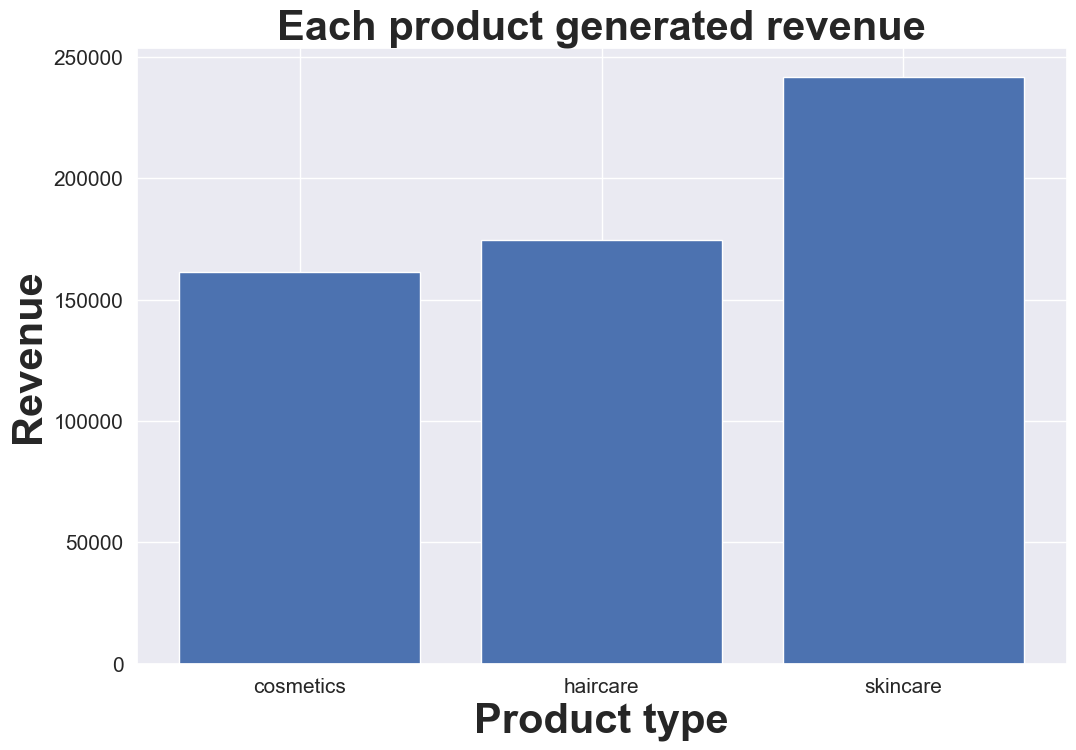

In [201]:
plt.figure(figsize = (12,8))

plt.bar(list(supplychain_df.groupby(['Product type'])['Revenue generated'].sum().keys()),supplychain_df.groupby(['Product type'])['Revenue generated'].sum());
plt.title('Each product generated revenue', fontsize = 30, weight = 'bold')
plt.xlabel('Product type', fontsize = 30, weight = 'bold')
plt.ylabel('Revenue',fontsize = 30,weight = 'bold')
plt.xticks(rotation = 0, fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

### Observations:
1) The main concept of the above data to find the revenue of the products
2) Skincare item's get more revenue generated and then Hair products also gain good revenue
3) cosmetics get less revenue compare to other revenue item's

In [16]:
# identify thw what are the locations gain most revenue during the product items
supplychain_df.groupby(['Product type','Location'])[['Revenue generated']].sum().sort_index().sort_values(by = 'Product type',ascending = False).unstack().style.background_gradient(cmap='winter_r')

Observations:

- From the above information made create a data which product type get more revenued in location wise

- As from the data skincare products get more revenue in kolkata and then chennai, mumbai,Bangalore and the last city was delhi

- According to the haricare products Bangalore get more revenued then Mumbai,kolkatha,chennai and the delhi will be less revenued generated

- Coming to the cosmetics Mumbai get more profit and Delhi second place the chennai,Kotkata and the bangalore will be the less revenued generated.

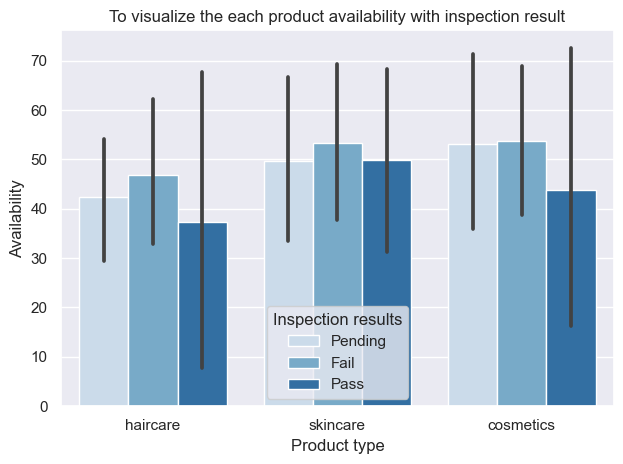

In [17]:
# we visualize the each product type in with items availability columns hue with ispection result
sns.set_theme(context='notebook',style='darkgrid')
sns.barplot(data=supplychain_df,x='Product type',y='Availability',hue='Inspection results', palette="Blues")
plt.title("To visualize the each product availability with inspection result")
plt.tight_layout()
plt.show()

Observations:

- Form the bar chart we visualize the each product avalibality and how many products done inspection in the process we get the product is pending and either fail or pass

- From hair care products Fail product are more compare to pending and less percentage product pass it.

- From the skin care hear also same thing happend more product fali. both pending and pass percentage are equal.

- Let's talk about cosmetics the percentage of the fail and pending nearly equal and pass percentage less.

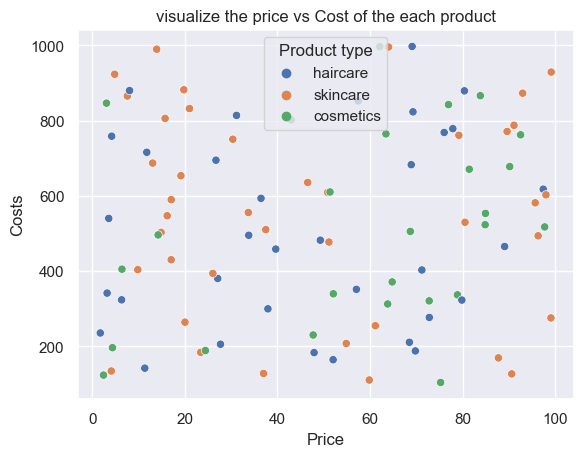

In [18]:
# visualize the scatter plot with actual price and cost of the each product
sns.set_theme(style='darkgrid')
sns.scatterplot(data=supplychain_df,x='Price',hue='Product type',y='Costs')
plt.title("visualize the price vs Cost of the each product")
plt.show()

In [19]:
# what was the manufacturing costs of the product
supplychain_df.groupby('Product type')['Manufacturing costs'].sum()


Product type
cosmetics    1119.371253
haircare     1647.571776
skincare     1959.726295
Name: Manufacturing costs, dtype: float64

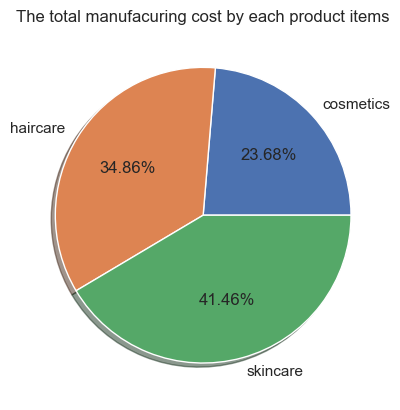

In [20]:
plt.title('The total manufacuring cost by each product items')
plt.pie(supplychain_df.groupby('Product type')['Manufacturing costs'].sum(), labels = list(supplychain_df.groupby('Product type')['Manufacturing costs'].sum().keys()), autopct = '%1.2f%%',center = (0,10), shadow = True)
plt.show()

## Observation
- From the above data skincare has more required for manufacturing costs
- Then Hari care get less manufacruring cost compare to skin care and cosmetics get less manufacturing costs.

In [23]:
# what is the defect rate of each product items?
supplychain_df.groupby('Product type')['Defect rates'].sum().sort_values(ascending = False)

Product type
skincare     93.387231
haircare     84.427107
cosmetics    49.901461
Name: Defect rates, dtype: float64

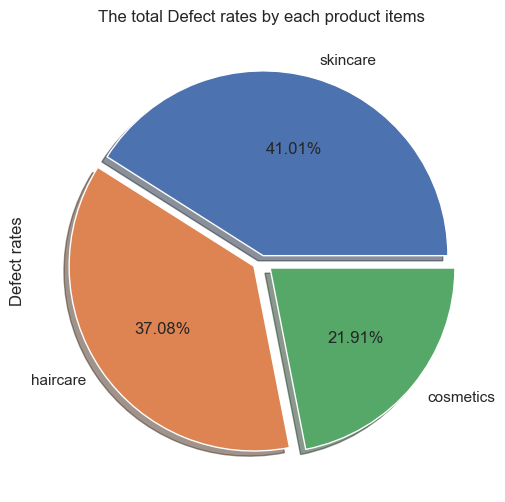

In [28]:
plt.figure(figsize = (15,6))
plt.pie(supplychain_df.groupby('Product type')['Defect rates'].sum().sort_values(ascending = False),labels = list(supplychain_df.groupby('Product type')['Defect rates'].sum().sort_values(ascending = False).keys()), autopct = '%1.2f%%', explode = [0.03,0.05,0.06],shadow = True)
plt.title('The total Defect rates by each product items')
plt.ylabel('Defect rates')
plt.show()

Observation
- From above pie chart we can see that skin care product items has highest defect rates, may be because of short duration expiry rate.


In [32]:
# create a pivot table to under standing the total products sold in location wise with product types
pd.pivot_table(supplychain_df, index = 'Product type', columns = ['Location'],values ='Number of products sold',aggfunc = np.mean).style.background_gradient(cmap = 'twilight_shifted_r')

Location,Bangalore,Chennai,Delhi,Kolkata,Mumbai
Product type,,,,,
cosmetics,513.666667,348.600000,667.166667,315.500000,401.000000
haircare,240.000000,386.833333,651.500000,425.875000,445.285714
skincare,286.500000,522.666667,621.200000,623.153846,443.000000


## Observation

- From above pivot table we can see that cosmectics product has highest sale in delhi region and for haircare products also delhi has highest sale

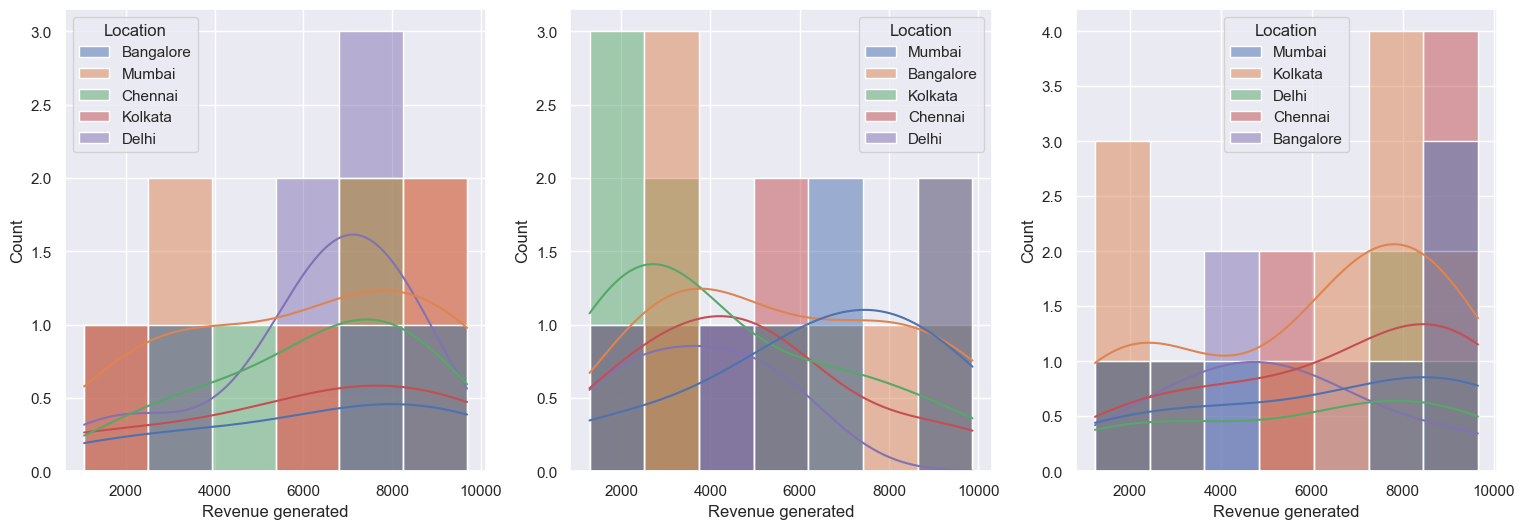

In [36]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=supplychain_df[supplychain_df['Product type']=='cosmetics'],x='Revenue generated',kde=True,hue='Location')
plt.subplot(142)
ax =sns.histplot(data=supplychain_df[supplychain_df['Product type']=='haircare'],x='Revenue generated',kde=True,hue='Location')
plt.subplot(143)
ax =sns.histplot(data=supplychain_df[supplychain_df['Product type']=='skincare'],x='Revenue generated',kde=True,hue='Location')
plt.show()

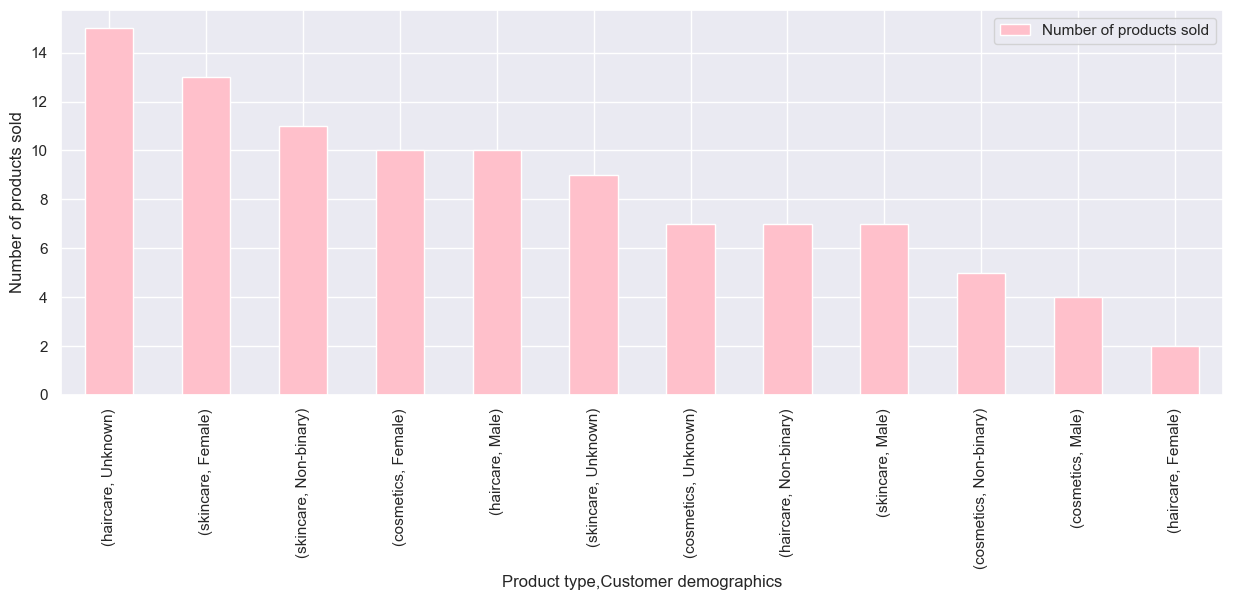

In [170]:
new_df = pd.pivot_table(data = supplychain_df, index = ['Product type','Customer demographics'],values = 'Number of products sold',aggfunc = 'count')
new_df.sort_values(by = ['Number of products sold'],ascending = False,inplace = True)
ax = new_df.plot(kind = 'bar', ylabel='Number of products sold',color = 'pink', figsize = (15,5)


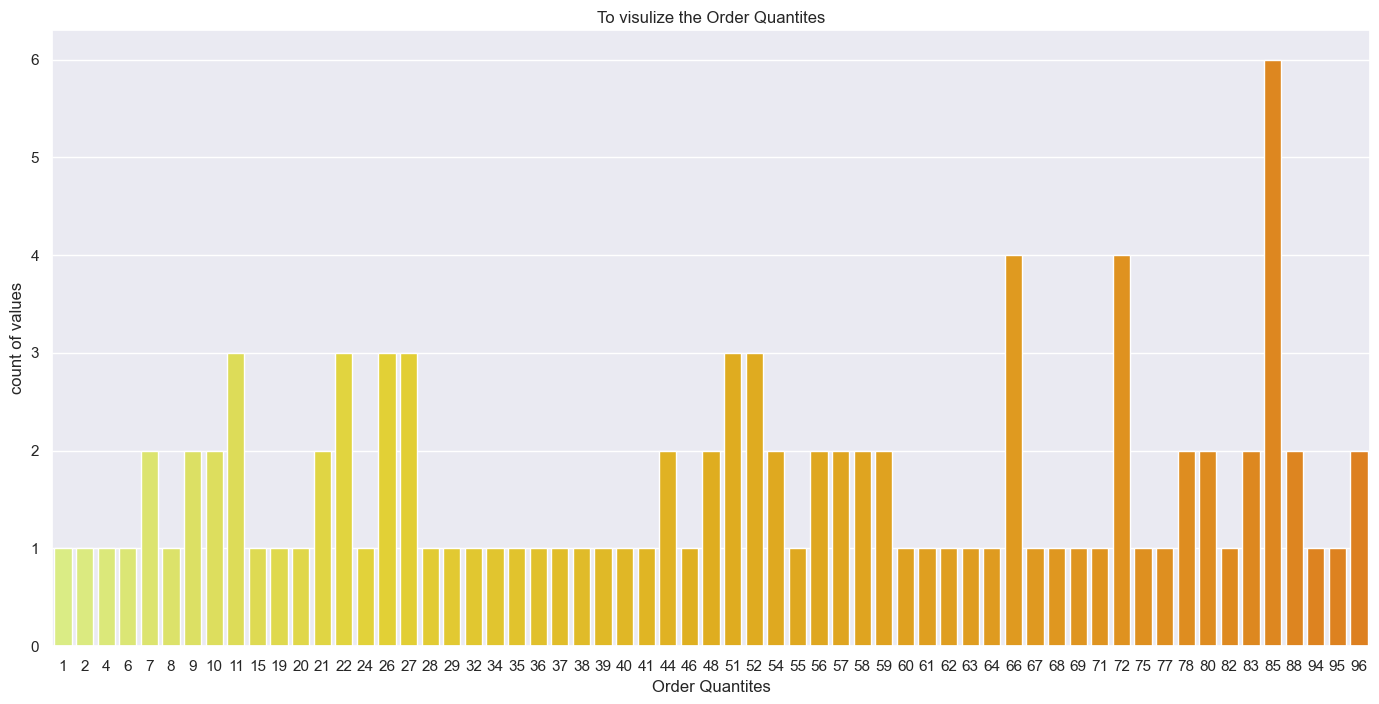

In [190]:
plt.figure(figsize=(17,8))
sns.countplot(data=supplychain_df,x='Order quantities',palette='Wistia')
plt.title("To visulize the Order Quantites")
plt.xlabel("Order Quantites")
plt.ylabel("count of values")
plt.show()

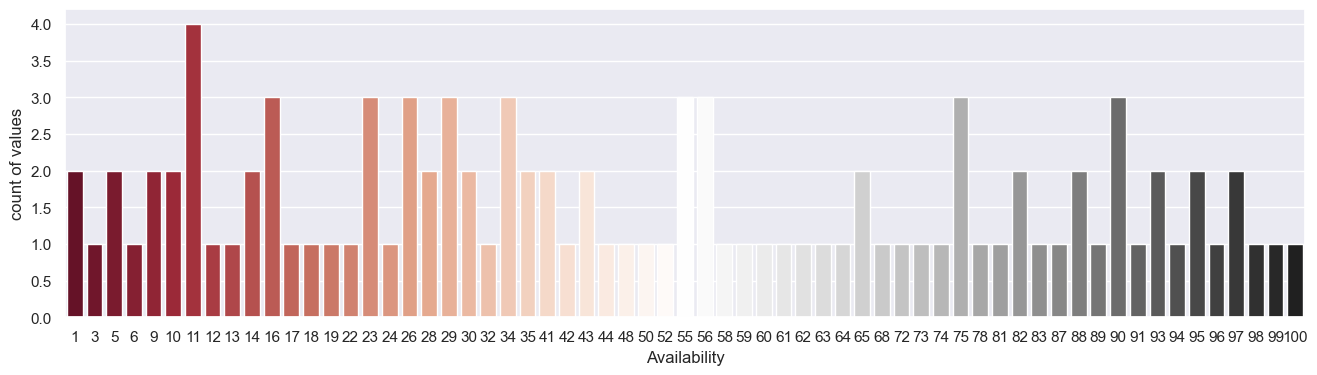

In [191]:
plt.figure(figsize=(16,4))
sns.countplot(data=supplychain_df,x='Availability',palette='RdGy')
plt.xlabel("Availability")
plt.ylabel("count of values")
plt.show()

Observations:
- From above chart's the highest quantity is 85 later 66 and 72
- In the second chart 11 was repeted 4 times which mean 11 products was available in 4 time and 55 and 56 availbel 3 times

In [203]:
#Shipping cost of the each supplies with location wise
supplychain_df.groupby(['Supplier name','Location'])[['Shipping costs']].sum()\
.sort_index()\
.unstack()\
.style.background_gradient(cmap='Reds')

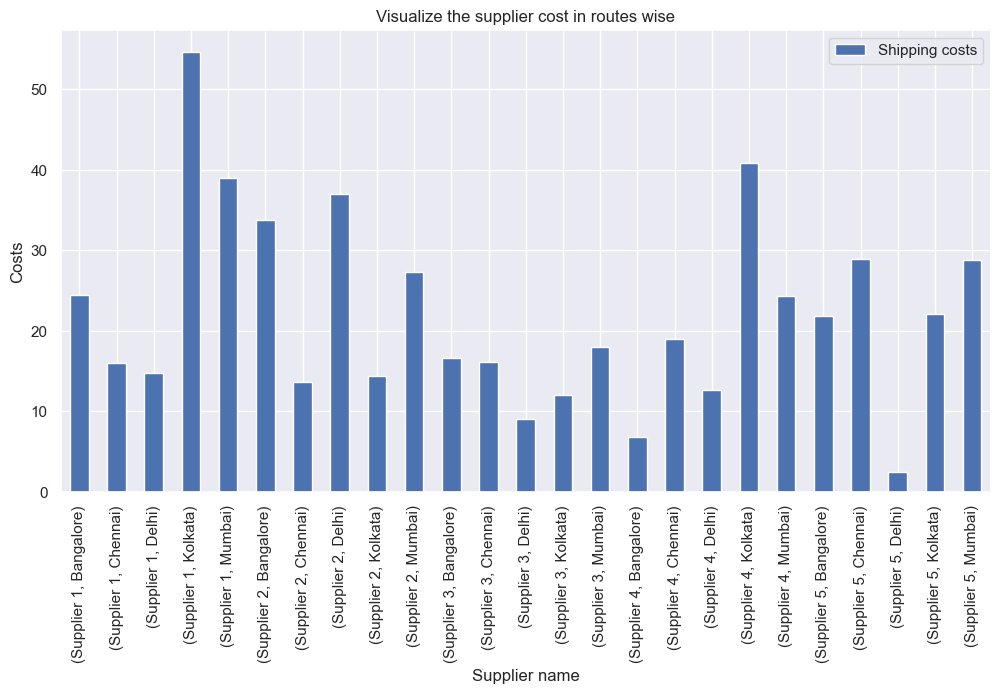

In [204]:
supplier=supplychain_df.groupby(['Supplier name','Location'])[['Shipping costs']].sum()
supplier.plot(kind='bar',title="Visualize the supplier cost in routes wise",figsize=(12,6))
plt.xlabel("Supplier name")
plt.ylabel("Costs")
plt.show()

Observations:
- Another dataframe created for identify with which location each suplies spend most shipping price
- Supplier 1 spend mores shipping cost in kolkata and mumbai.
- Supplier 2 spend mores shipping cost in Delhi and Benguluru.
- Supplier 3 spend mores shipping cost in Benguluru and mumbai.
- Supplier 4 spend mores shipping cost in kolkata and mumbai.
- Supplier 5 spend mores shipping cost in chennai and mumbai.

In [205]:
Transportation=pd.pivot_table(data,index='Supplier name',columns=['Transportation modes'],values='Costs')
Transportation.plot(kind='bar',title="Visualize the supplier cost in Transportation modes",figsize=(12,6),hatch='/')
plt.xlabel("Supplier name")
plt.ylabel("Costs")
plt.show()

NameError: name 'data' is not defined